In [1]:
import pandas as pd
import numpy as np

In [2]:
pdf=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
pdf.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
pdf.drop(['area_type', 'availability','society','balcony' ], axis=1, inplace=True)

In [5]:
pdf.head(2)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00


In [6]:
pdf.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
pdf.dropna(subset=['size','location','bath'], inplace=True)
pdf.shape

(13246, 5)

In [8]:
pdf['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
pdf['bhk']=pdf['size'].apply(lambda x:int(x.split()[0]))
pdf.drop(['size'], axis=1, inplace=True)

In [10]:
pdf.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
pdf[~pdf['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [13]:
pdf.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [15]:
pdf1=pdf.copy()

In [16]:
pdf1['total_sqft']=pdf['total_sqft'].apply(convert_sqft_to_num)
pdf1 = pdf1[pdf1.total_sqft.notnull()]
pdf1.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4


In [17]:
pdf1.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [18]:
pdf1.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [19]:
pdf2 = pdf1.copy()
pdf2['price_per_sqft'] = pdf2['price']*100000/pdf2['total_sqft']
pdf2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [20]:
pdf2_stats = pdf2['price_per_sqft'].describe()
pdf2_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [21]:
pdf2.location = pdf2.location.apply(lambda x: x.strip())
location_stats = pdf2['location'].value_counts(ascending=False)
location_stats

location
Whitefield                           533
Sarjapur  Road                       392
Electronic City                      304
Kanakpura Road                       264
Thanisandra                          235
                                    ... 
Zuzuvadi                               1
Chellikere                             1
Jakkasandra                            1
Gulakamale                             1
Beml layout, Rajarajeshwari nagar      1
Name: count, Length: 1287, dtype: int64

In [22]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Ganga Nagar                          10
Kalkere                              10
Dairy Circle                         10
1st Block Koramangala                10
Sector 1 HSR Layout                  10
                                     ..
Zuzuvadi                              1
Chellikere                            1
Jakkasandra                           1
Gulakamale                            1
Beml layout, Rajarajeshwari nagar     1
Name: count, Length: 1047, dtype: int64

In [25]:
len(pdf2.location.unique())

1287

In [27]:
pdf2.location = pdf2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(pdf2.location.unique())

241

In [28]:
if pdf2['location'].isin(['other']).any():
    print("Column 'other' is present.")
else:
    print("Column 'other' is not present.")

Column 'other' is present.


In [29]:
pdf2[pdf2.total_sqft/pdf2.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [30]:
a1 = pdf2[~(pdf2.total_sqft/pdf2.bhk<300)]
a1.shape

(12456, 6)

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    
a2 = remove_pps_outliers(a1)
a2.shape

(10242, 6)

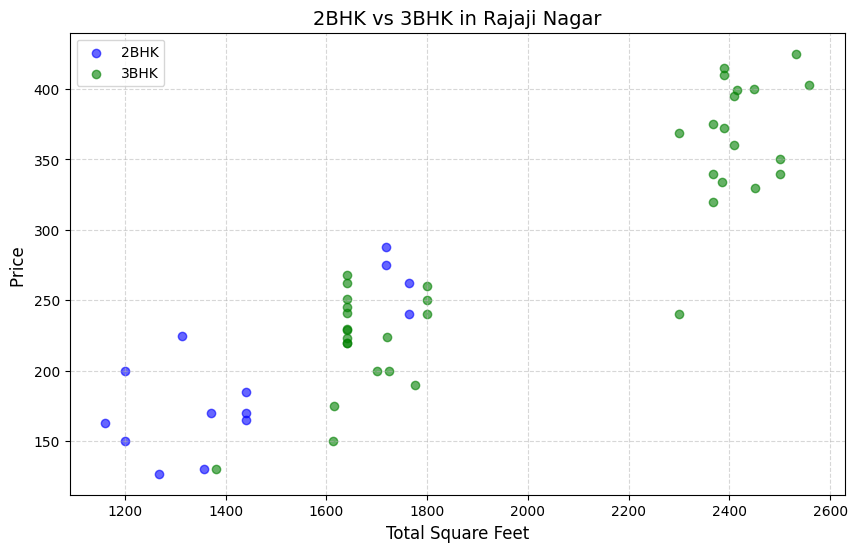

In [32]:
import matplotlib.pyplot as plt

def plot_2bhk_vs_3bhk(df, location):
    
    # Filter the DataFrame for the given location
    location_data = df[df['location'] == location]

    # Separate data for 2BHK and 3BHK
    bhk_2 = location_data[location_data['bhk'] == 2]
    bhk_3 = location_data[location_data['bhk'] == 3]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(bhk_2['total_sqft'], bhk_2['price'], color='blue', label='2BHK', alpha=0.6)
    plt.scatter(bhk_3['total_sqft'], bhk_3['price'], color='green', label='3BHK', alpha=0.6)

    # Labeling the axes and the plot
    plt.xlabel('Total Square Feet', fontsize=12)
    plt.ylabel('Price ', fontsize=12)
    plt.title(f'2BHK vs 3BHK in {location}', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
plot_2bhk_vs_3bhk(a2,'Rajaji Nagar')

In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
a3 = remove_bhk_outliers(a2)
# df8 = df7.copy()
a2.shape

(10242, 6)

In [34]:
import matplotlib.pyplot as plt

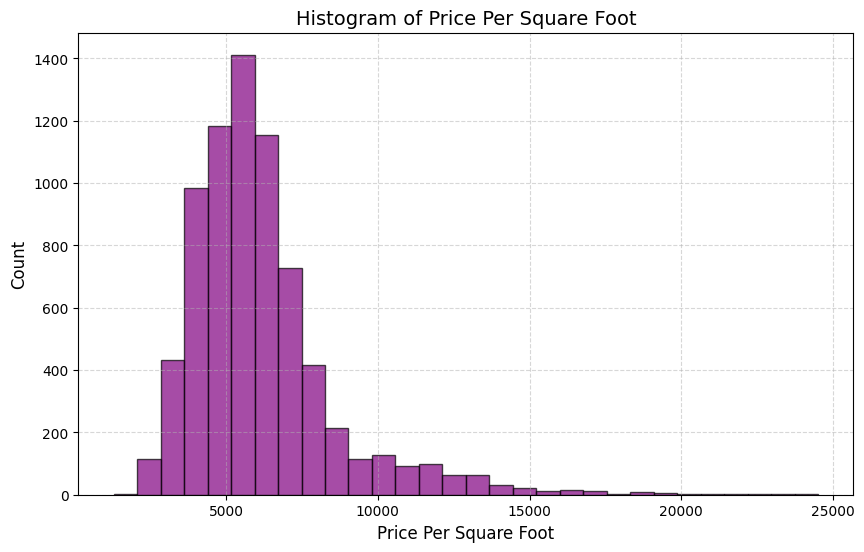

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(a3['price_per_sqft'], bins=30, color='purple', alpha=0.7, edgecolor='black')

# Labeling the axes and the plot
plt.xlabel('Price Per Square Foot', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Price Per Square Foot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [36]:
len(a3[a3.bath>a3.bhk+2])

4

In [37]:
a4 = a3[a3.bath <= a3.bhk + 1]
a4.shape

(7239, 6)

In [38]:
a5=a4.drop(['price_per_sqft'],axis=1)
a5.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [39]:
dummies=pd.get_dummies(a5.location,dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
a6 = pd.concat([a5,dummies.drop('other',axis='columns')],axis='columns')
a6.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
a7=a6.drop(['location'],axis=1)
a7.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X=a7.drop(['price'],axis=1)
y=a7.price
X.head(1) 

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()

In [45]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [46]:
lr_clf.score(X_train,y_train)

0.8523137584485154

In [47]:
lr_clf.score(X_test,y_test)

0.8629132245229444

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define ShuffleSplit cross-validation
cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=0)

# Perform cross-validation and get the scores
scores = cross_val_score(LinearRegression(), X, y, cv=cv)

# Print the scores formatted to 2 decimal places
print("Cross-validation scores:", np.round(scores, 2))

Cross-validation scores: [0.83 0.86 0.85 0.84 0.85 0.8 ]


In [49]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    # Defining models and their hyperparameter grids
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # Removed 'normalize' because it's deprecated
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    # Initialize the list to store results
    scores = []
    
    # ShuffleSplit cross-validation
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    # Iterate over models and perform GridSearchCV
    for algo_name, config in algos.items():
        try:
            gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
            gs.fit(X, y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
        except Exception as e:
            print(f"Error with {algo_name}: {e}")
    
    # Return the results as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [50]:
find_best_model_using_gridsearchcv(X,y)

C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

,model,best_score,best_params
0,linear_regression,0.847796,{}
1,lasso,0.726738,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.719451,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [64]:
import numpy as np
import pandas as pd

def predict_price(location, sqft, bath, bhk, X, lr_clf):    
    # Step 1: Get the index of the location from the feature columns
    loc_index = np.where(X.columns == location)[0][0]

    # Step 2: Prepare the feature vector (with zeroes for all other columns)
    x = np.zeros(len(X.columns))
    x[0] = sqft   # total_sqft
    x[1] = bath    # bathrooms
    x[2] = bhk     # bhk
    
    # Step 3: Set the location index to 1 (one-hot encoding)
    if loc_index >= 0:
        x[loc_index] = 1

    # Step 4: Convert the feature vector to a DataFrame (matching the model's expected format)
    features_df = pd.DataFrame([x], columns=X.columns)

    # Step 5: Make the prediction
    predicted_price = lr_clf.predict(features_df)
    
    return predicted_price[0]

# Example usage:
predicted_price = predict_price('1st Phase JP Nagar', 1000, 2, 2, X_train, lr_clf)
print(f"Predicted price: {predicted_price}")

Predicted price: 83.86570258311897


In [66]:
predicted_price =predict_price('Indira Nagar',1000, 2, 2, X_train, lr_clf)
print(f"Predicted price: {predicted_price}")

Predicted price: 193.3119773317979


In [70]:
import pickle
with open('banglore_home_prices_mod.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("cols.json","w") as f:
    f.write(json.dumps(columns))